In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
brasil_csv = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Projeto/covid-19-data-master/public/data/vaccinations/country_data/Brazil.csv')

In [113]:
brasil_csv.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Brazil,2021-01-17,Sinovac,https://coronavirusbra1.github.io,112,112.0,0.0,0
1,Brazil,2021-01-18,Sinovac,https://coronavirusbra1.github.io,1109,1109.0,0.0,0
2,Brazil,2021-01-19,Sinovac,https://coronavirusbra1.github.io,13527,13527.0,0.0,0
3,Brazil,2021-01-20,Sinovac,https://coronavirusbra1.github.io,105824,105824.0,0.0,0
4,Brazil,2021-01-21,Sinovac,https://coronavirusbra1.github.io,193699,193699.0,0.0,0


In [2]:
new_csv = pd.read_csv('/Users/thalesoliveira/Documents/CBPF/ML_course/Projeto/covid-19-data-master/public/data/latest/owid-covid-latest.csv')

In [15]:
new_csv.iloc[29] ## Brasil 

iso_code                                             BRA
continent                                  South America
location                                          Brazil
last_updated_date                             2022-03-23
total_cases                                   29738362.0
                                               ...      
human_development_index                            0.765
excess_mortality_cumulative_absolute                 NaN
excess_mortality_cumulative                          NaN
excess_mortality                                     NaN
excess_mortality_cumulative_per_million              NaN
Name: 29, Length: 67, dtype: object

In [16]:
new_csv.iloc[68] ## Europe

iso_code                                      OWID_EUR
continent                                          NaN
location                                        Europe
last_updated_date                           2022-03-23
total_cases                                174179930.0
                                              ...     
human_development_index                            NaN
excess_mortality_cumulative_absolute               NaN
excess_mortality_cumulative                        NaN
excess_mortality                                   NaN
excess_mortality_cumulative_per_million            NaN
Name: 68, Length: 67, dtype: object

In [18]:
new_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    233 non-null    object 
 1   continent                                   220 non-null    object 
 2   location                                    233 non-null    object 
 3   last_updated_date                           233 non-null    object 
 4   total_cases                                 228 non-null    float64
 5   new_cases                                   228 non-null    float64
 6   new_cases_smoothed                          228 non-null    float64
 7   total_deaths                                220 non-null    float64
 8   new_deaths                                  220 non-null    float64
 9   new_deaths_smoothed                         220 non-null    float64
 10  total_cases_pe

Text(0, 0.5, 'Life Expectancy')

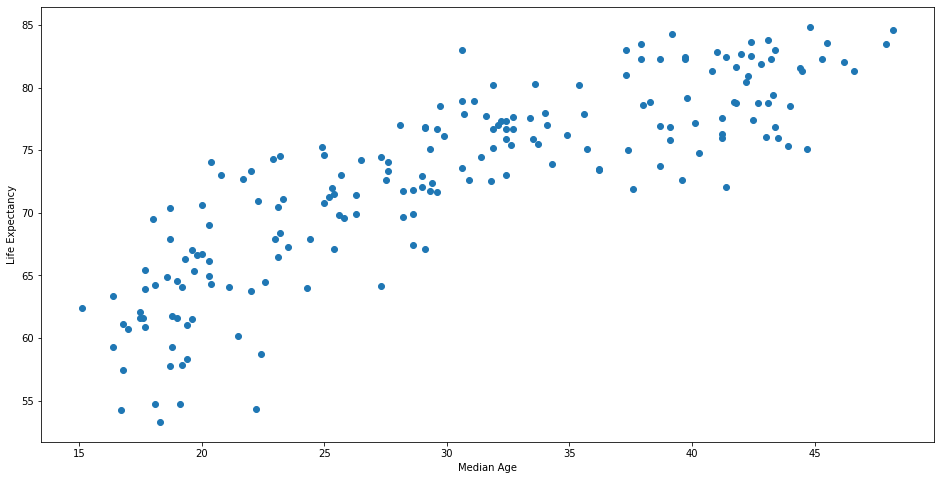

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['median_age'], new_csv['life_expectancy'])
plt.xlabel('Median Age')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Total deaths')

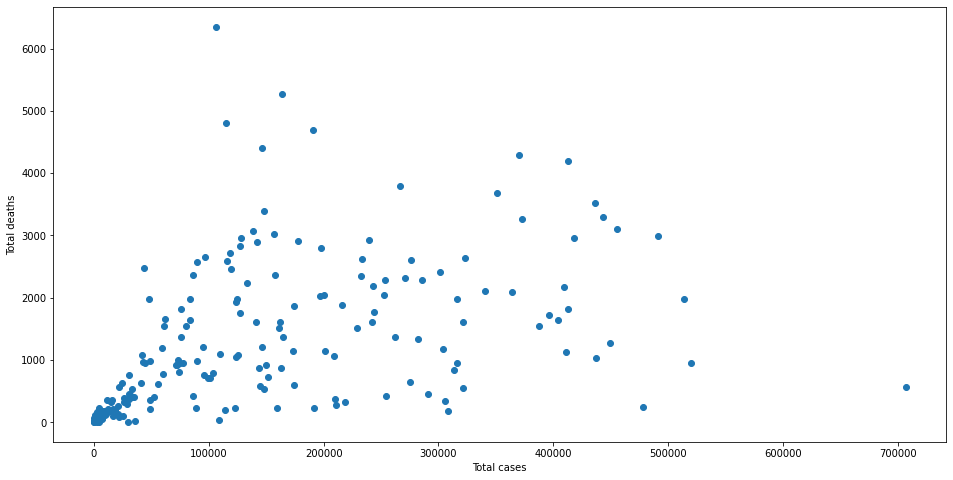

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['total_cases_per_million'], new_csv['total_deaths_per_million'])
plt.xlabel('Total cases')
plt.ylabel('Total deaths')

Text(0, 0.5, 'Total deaths')

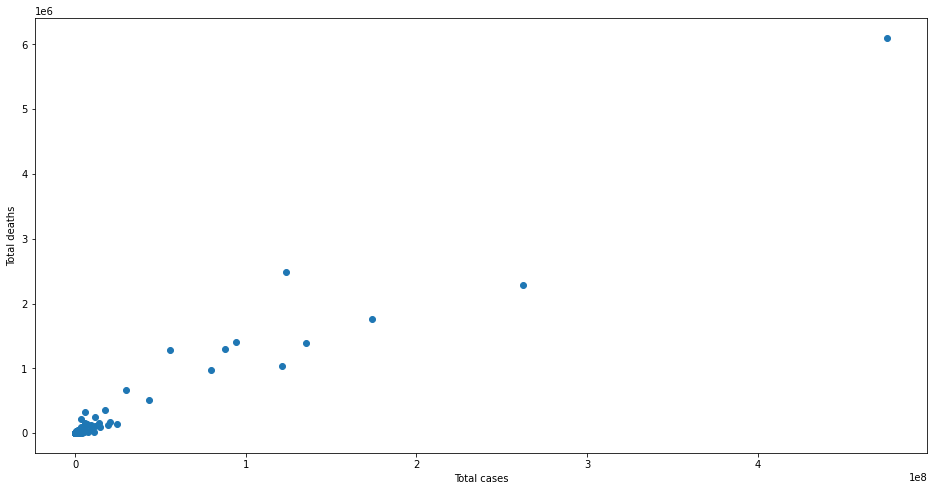

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['total_cases'], new_csv['total_deaths'])
plt.xlabel('Total cases')
plt.ylabel('Total deaths')

In [20]:
max(new_csv['aged_70_older'])

18.493

In [21]:
max(new_csv['aged_65_older'])

27.049

(array([59., 39., 28., 12., 11., 15., 12.,  9.,  3.,  1.]),
 array([ 0.526 ,  2.3227,  4.1194,  5.9161,  7.7128,  9.5095, 11.3062,
        13.1029, 14.8996, 16.6963, 18.493 ]),
 <BarContainer object of 10 artists>)

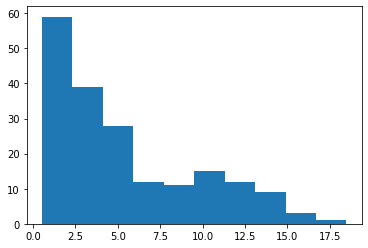

In [12]:
plt.hist(new_csv['aged_70_older'])

#51  aged_65_older                               188 non-null    float64
# 52  aged_70_older                               189 non-null    float64

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Create the model

In [81]:
new_csv['total_deaths'].reshape(233,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [139]:
array_deaths = np.array(new_csv['total_deaths'].iloc[:15])
array_cases = np.array(new_csv['total_cases'].iloc[:15])

In [140]:
deaths = array_deaths.reshape(15,1)
cases = array_cases.reshape(15,1)

In [129]:
deaths.shape

(15, 1)

In [141]:
lin_reg.fit(cases,deaths)

LinearRegression()

In [131]:
lin_reg.coef_ 

array([[0.01032266]])

In [132]:
pred = lin_reg.predict(deaths)

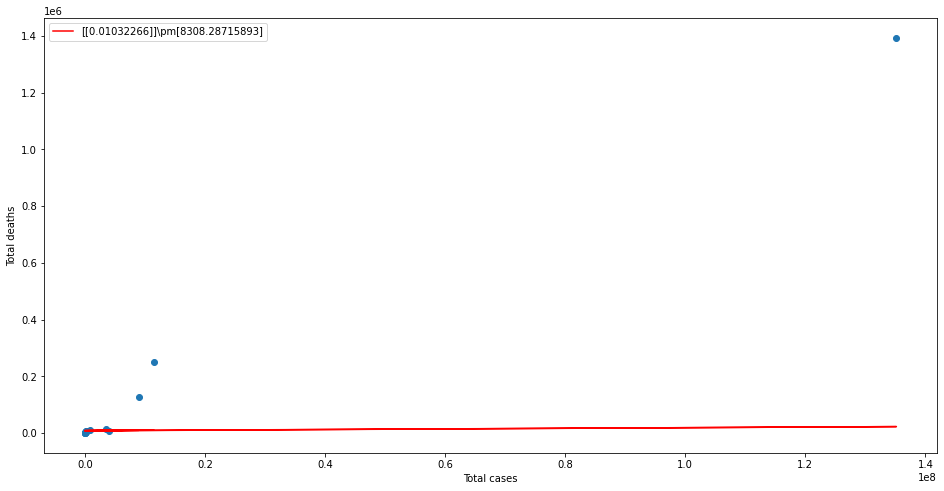

In [134]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['total_cases'].iloc[:15], new_csv['total_deaths'].iloc[:15])
plt.plot(new_csv['total_cases'].iloc[:15], pred, "r-", markersize = 20, label=str(lin_reg.coef_)+'\pm'+str(lin_reg.intercept_))  # red line (regression)
plt.xlabel('Total cases')
plt.ylabel('Total deaths')
plt.legend()

In [108]:
lin_reg.intercept_

array([410.73868255])

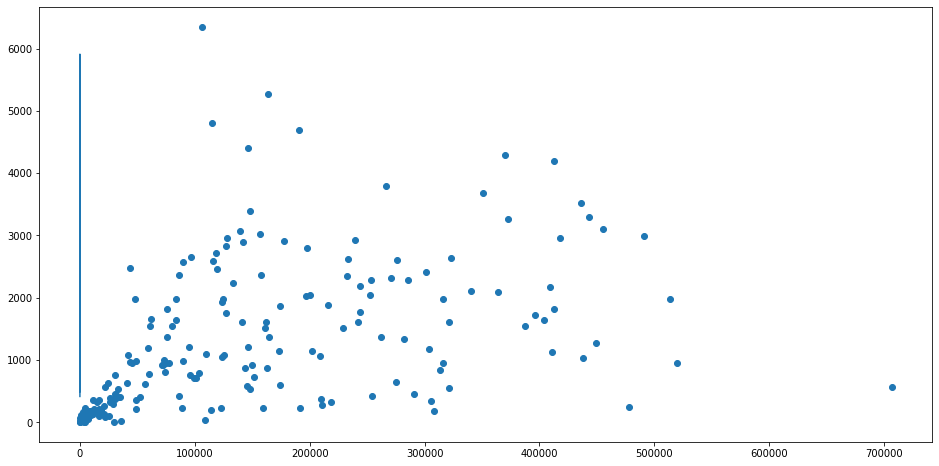

In [111]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['total_cases_per_million'], new_csv['total_deaths_per_million'])
plt.plot(pred)

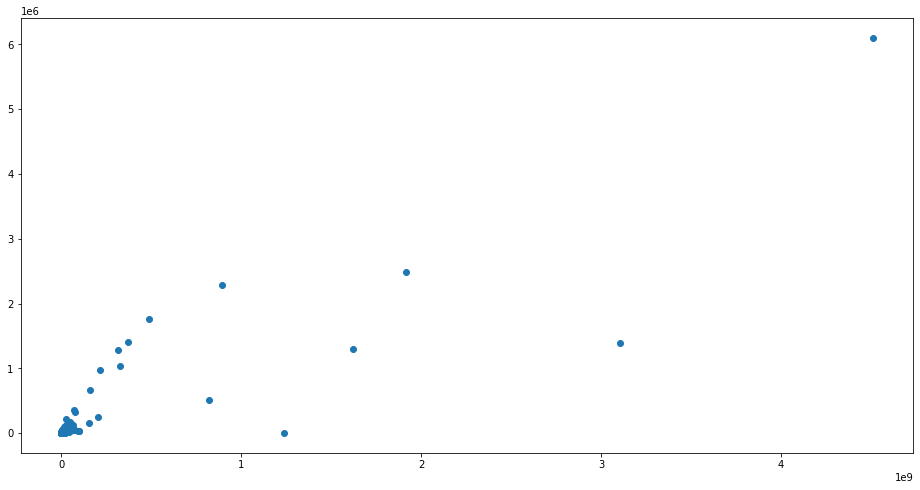

In [40]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['people_fully_vaccinated'], new_csv['total_deaths'])

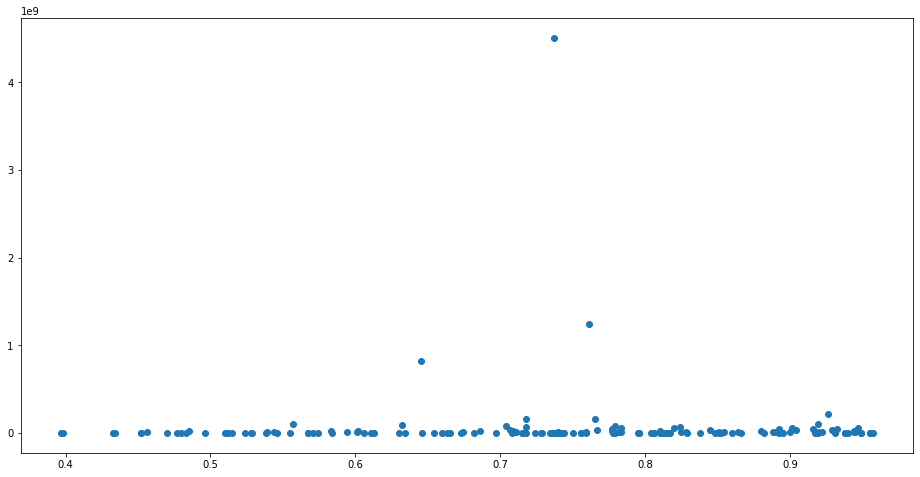

In [58]:
plt.figure(figsize=(16,8))
plt.scatter(new_csv['human_development_index'], new_csv['people_fully_vaccinated'])

In [54]:
new_csv.iloc[29]['total_cases']

29738362.0